In [1]:
from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup

import os
import numpy as np
import matplotlib.pyplot as plt
import torch

PARENT_PATH = setup.PARENT_PATH
ISONET_PATH = os.path.join(PARENT_PATH, 'data/isoNet/')

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [8]:
# cet_path = os.path.join(PARENT_PATH, 'data/raw_cryo-ET/tomo02.mrc') 
# cet_path = os.path.join(ISONET_PATH, 'RAW_dataset/RAW_allTomos_deconv/tomo04.mrc') 
# out_filename = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo04_deconvDummy.mrc')
# cet_path = os.path.join(ISONET_PATH, 'RAW_dataset/RAW_allTomos_deconv/tomo02.mrc') 
# out_filename = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo02_deconvDummy.mrc')
cet_path = os.path.join(PARENT_PATH, 'data/nnUnet/nifti_files/tomo02_bin4_denoised_0000.nii.gz') 
out_filename = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo02_cryoCAREDummy.mrc')


tomo_data = read_array(cet_path)
tomo_data.shape

(464, 928, 928)

In [9]:
z,y,x = tomo_data.shape

In [10]:
dummy_tomo = tomo_data[z//4:3*z//4, y//4:3*y//4, x//4:3*x//4]
dummy_tomo.shape

(232, 464, 464)

(array([3.6000000e+01, 6.8500000e+02, 2.6340000e+03, 4.8930000e+03,
        4.5754000e+04, 4.9886798e+07, 6.3440000e+03, 1.2710000e+03,
        2.4000000e+02, 1.7000000e+01]),
 array([-62.753998 , -50.964275 , -39.174553 , -27.384829 , -15.595105 ,
         -3.8053818,   7.9843416,  19.774065 ,  31.563787 ,  43.35351  ,
         55.143234 ], dtype=float32),
 <BarContainer object of 10 artists>)

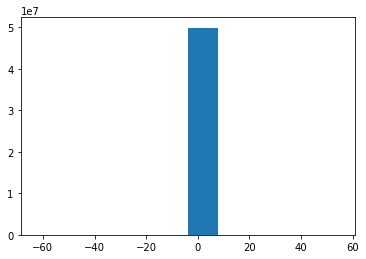

In [11]:
plt.hist(dummy_tomo.flatten())

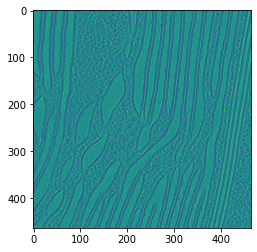

In [12]:
plt.imshow(dummy_tomo[232//2])

In [13]:
write_array(dummy_tomo, out_filename)